In [1]:
import pleasy
from scipy.optimize import fsolve

import drops, utilities, waves, wave_reflection, vertical, constants

%matplotlib notebook

-3.91307378748e-06 -3.91307378739e-06 -3.91307378748e-06 -3.91307378739e-06
-2.2603344996e-05 -2.26033449955e-05 -2.2603344996e-05 -2.26033449955e-05
-5.42369262668e-06 -5.42369262506e-06 -5.42369262668e-06 -5.42369262506e-06
4.19467342055e-05 4.19467341952e-05 4.19467342055e-05 4.19467341952e-05
-4.82472596134e-06 -4.82472595812e-06 -4.82472596134e-06 -4.82472595812e-06
6.95737176952e-05 6.95737176772e-05 6.95737176952e-05 6.95737176772e-05
-1.25936290895e-06 -1.25936291398e-06 -1.25936290895e-06 -1.25936291398e-06
-7.33366323143e-05 -7.33366322855e-05 -7.33366323143e-05 -7.33366322855e-05
4.35203750994e-08 4.35203672742e-08 4.35203750994e-08 4.35203672742e-08
-1.99971329671e-05 -1.99971329295e-05 -1.99971329671e-05 -1.99971329295e-05
-9.02365075933e-06 -9.02365075122e-06 -9.02365075933e-06 -9.02365075122e-06
0.000112567486157 0.000112567486113 0.000112567486157 0.000112567486113
-5.25612382241e-06 -5.2561238203e-06 -5.25612382241e-06 -5.2561238203e-06
-2.0942212742e-05 -2.09422127811

-4.14014536165e-06 -4.14014535879e-06 -4.14014536165e-06 -4.14014535879e-06
9.70349986329e-05 9.70349985943e-05 9.70349986329e-05 9.70349985943e-05
-5.09821639868e-06 -5.09821639466e-06 -5.09821639868e-06 -5.09821639466e-06
0.000101702479143 0.000101702479097 0.000101702479143 0.000101702479097
-6.77271097262e-06 -6.77271096414e-06 -6.77271097262e-06 -6.77271096414e-06
8.15904179364e-05 8.15904178823e-05 8.15904179364e-05 8.15904178823e-05
-3.48645970795e-06 -3.48645970739e-06 -3.48645970795e-06 -3.48645970739e-06
9.47718285836e-05 9.4771828554e-05 9.47718285836e-05 9.4771828554e-05
-7.8477605002e-06 -7.84776048964e-06 -7.8477605002e-06 -7.84776048964e-06
8.57943124379e-05 8.57943123747e-05 8.57943124379e-05 8.57943123747e-05
-4.37383572406e-06 -4.3738357206e-06 -4.37383572406e-06 -4.3738357206e-06
9.84904760009e-05 9.84904759593e-05 9.84904760009e-05 9.84904759593e-05
-4.31101337956e-06 -4.31101337756e-06 -4.31101337956e-06 -4.31101337756e-06
9.85721722746e-05 9.85721722374e-05 9.8572

-5.06487028098e-06 -5.06487027617e-06 -5.06487028098e-06 -5.06487027617e-06
8.68382473876e-05 8.68382473448e-05 8.68382473876e-05 8.68382473448e-05
-4.53067276984e-06 -4.53067276694e-06 -4.53067276984e-06 -4.53067276694e-06
9.87450609454e-05 9.87450609048e-05 9.87450609454e-05 9.87450609048e-05
-6.96084799639e-06 -6.96084798761e-06 -6.96084799639e-06 -6.96084798761e-06
8.19089033745e-05 8.19089033192e-05 8.19089033745e-05 8.19089033192e-05
-3.96077765935e-06 -3.96077765729e-06 -3.96077765935e-06 -3.96077765729e-06
9.59918412049e-05 9.59918411691e-05 9.59918412049e-05 9.59918411691e-05
-6.7277045961e-06 -6.72770458798e-06 -6.7277045961e-06 -6.72770458798e-06
8.06709255476e-05 8.06709254952e-05 8.06709255476e-05 8.06709254952e-05
-4.72003060209e-06 -4.72003059804e-06 -4.72003060209e-06 -4.72003059804e-06
9.89704055362e-05 9.89704054917e-05 9.89704055362e-05 9.89704054917e-05
-5.72984945999e-06 -5.72984945403e-06 -5.72984945999e-06 -5.72984945403e-06
8.97930400474e-05 8.97930399992e-05 8.

<IPython.core.display.Javascript object>


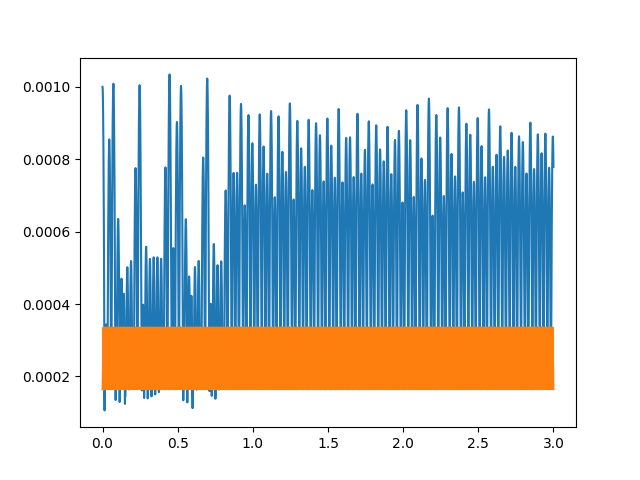

In [24]:
# Show the vertical motion against the bath, with an independent frame of reference. Don't take into account waves on the surface.
t = linspace(0, 3, 10000)

soln, impacts = drops.ode_standalone(t, corral=False)

z = soln[:, 0, 2]

fig, ax = plt.subplots()
ax.plot(t, z)
ax.plot(t, drops.surface_oscilation(t)[0] + constants.R_0)

<IPython.core.display.Javascript object>


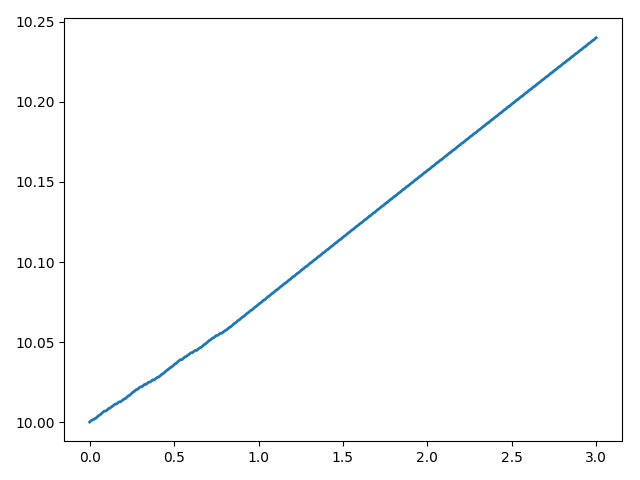

<IPython.core.display.Javascript object>


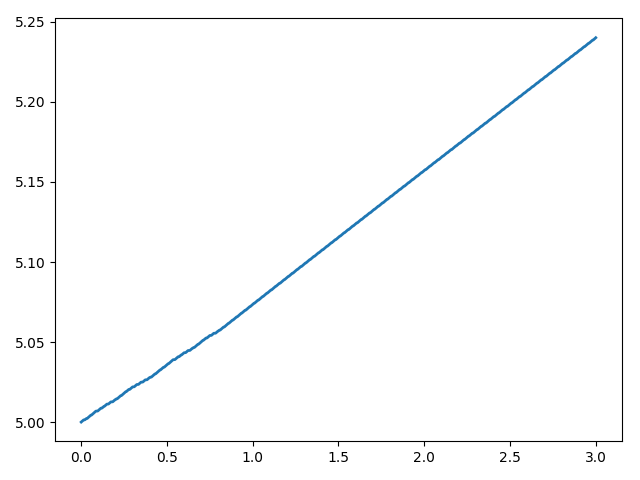

In [25]:
sx = soln[:, 0, 0]
sy = soln[:, 0, 1]

vx = soln[:, 0, 3]
vy = soln[:, 0, 4]

pleasy.plot(t, sx)
pleasy.plot(t, sy)

<IPython.core.display.Javascript object>


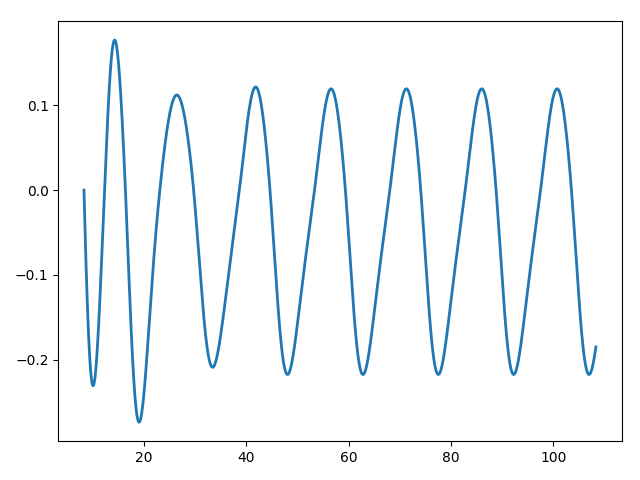

<IPython.core.display.Javascript object>


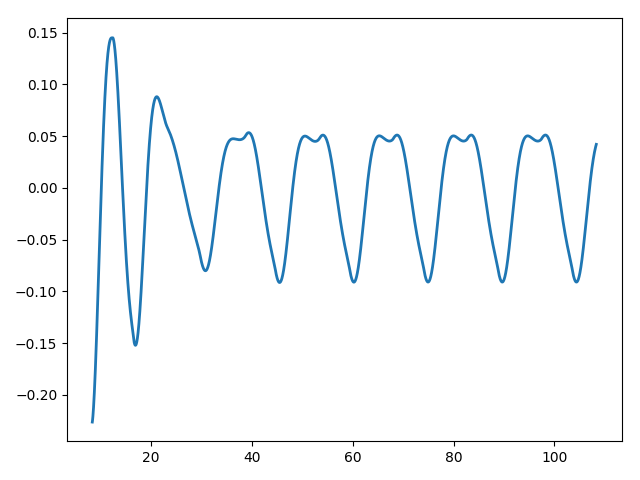

In [4]:
# Demonstrate the logarithmic spring model of the drop's vertical motion during contact with the bath.
t = linspace(0, .08, 10000)
τ = t * drops.ω_D

contact_τ = linspace(8.31729596928, 108.3172959693, int(1e5))
# τ += 1.46
contact_t = contact_τ / constants.ω_D

vz = -0.140045810331

soln2 = vertical.log_spring(contact_τ, vz)

Z, v = soln2[:, 0], soln2[:, 1]

pleasy.plot(contact_τ, Z)
pleasy.plot(contact_τ, v)

<IPython.core.display.Javascript object>


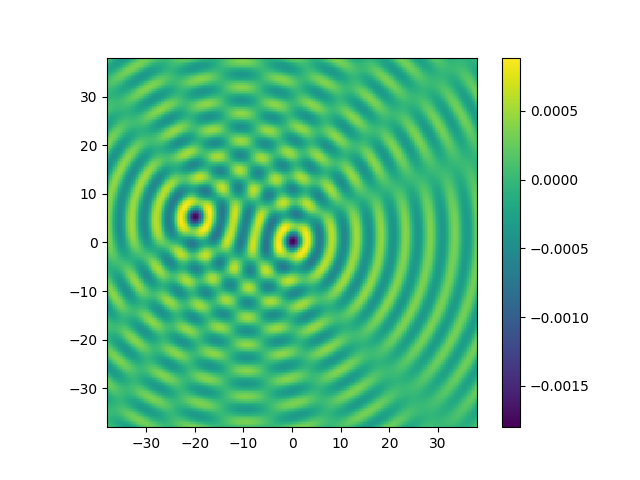

<IPython.core.display.Javascript object>


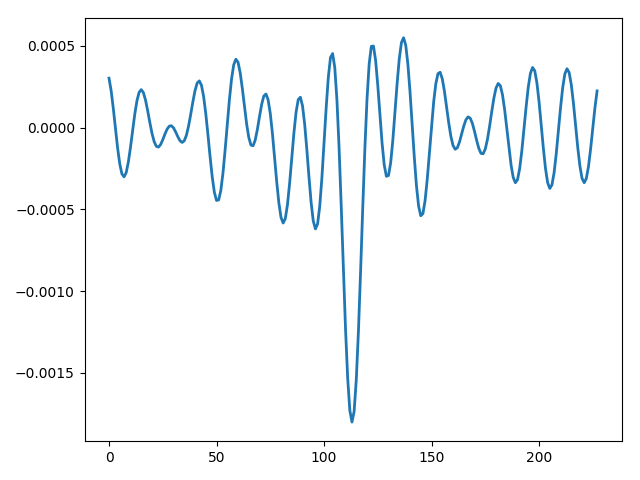

In [5]:
imps = [drops.Impact(0., 0., 0., 5.), drops.Impact(0., -20., 5., 5.)]
        
    
a = utilities.wave_field(.01, imps, resolution=3, plot=True, corral=False)

pleasy.plot(a[:, int(a.shape[1]/2)])